In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [3]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
customer_df = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/customer.parquet')
customer_df_info=customer_df.info()
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 159288 entries, 34 to 3499966
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   customer_id             159288 non-null  int64         
 1   residence_country       159288 non-null  object        
 2   gender                  159288 non-null  int64         
 3   age                     159288 non-null  int64         
 4   first_join_date         159288 non-null  datetime64[ns]
 5   residence_index         159288 non-null  object        
 6   channel_entrance        159288 non-null  object        
 7   activity_status         159288 non-null  int64         
 8   household_gross_income  159288 non-null  float64       
 9   saving_account          159288 non-null  int64         
 10  guarantees              159288 non-null  int64         
 11  junior_account          159288 non-null  int64         
 12  loans                   159288 no

,customer_id,residence_country,gender,age,first_join_date,residence_index,channel_entrance,activity_status,household_gross_income,saving_account,...,mortgage,employment_status,employment_status_int,personal_income,current_loan_amount,credit_score,customer_segment_model,years_calc,total_products_owned,junior_guarantee
34,15891,ES,0,59,2020-07-28,Y,KAT,1,121425.66,0,...,0,N,1,116031.54,0.00,850,0-1 year,0,0,0
144,15899,ES,1,57,2000-01-16,Y,KAT,1,130835.64,0,...,0,B,0,88154.70,0.00,850,5+ years,20,2,0
161,15900,ES,1,48,2000-01-16,Y,KAT,1,105327.03,0,...,0,B,0,72472.53,0.00,850,5+ years,20,1,0
195,15902,ES,0,57,2000-01-16,Y,KAT,1,230408.25,0,...,0,B,0,118014.08,0.00,850,5+ years,20,0,0
229,15906,ES,0,55,2006-02-16,Y,KAT,1,81005.49,0,...,1,N,1,64264.66,197599.45,726,5+ years,14,1,0


In [5]:
cust_transaction_df = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/transaction.parquet')
cust_transaction_df_info=cust_transaction_df.info()
cust_transaction_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 636875 entries, 0 to 636874
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    636875 non-null  int64         
 1   customer_id       636875 non-null  int64         
 2   transaction_date  636875 non-null  datetime64[ns]
 3   product_name      636875 non-null  object        
 4   transaction_type  636875 non-null  object        
 5   has_product       636875 non-null  int64         
 6   product_category  636875 non-null  object        
 7   product_type      636875 non-null  object        
 8   base_amount       636875 non-null  int64         
 9   currency          636875 non-null  object        
 10  amount            636875 non-null  float64       
 11  trans_year        636875 non-null  int32         
 12  trans_month       636875 non-null  int32         
 13  trans_quarter     636875 non-null  int32         
 14  trans_day

,transaction_id,customer_id,transaction_date,product_name,transaction_type,has_product,product_category,product_type,base_amount,currency,amount,trans_year,trans_month,trans_quarter,trans_dayofweek,trans_dayofmonth
0,1,16846,2020-01-28,saving_account,PURCHASE,1,Savings,Savings Account,1500,EUR,1387.09,2020,1,1,1,28
1,2,20387,2020-01-28,saving_account,PURCHASE,1,Savings,Savings Account,1500,EUR,1905.64,2020,1,1,1,28
2,3,27354,2020-01-28,saving_account,PURCHASE,1,Savings,Savings Account,1500,EUR,1708.79,2020,1,1,1,28
3,4,32666,2020-01-28,saving_account,PURCHASE,1,Savings,Savings Account,1500,EUR,1588.79,2020,1,1,1,28
4,5,39230,2020-01-28,saving_account,PURCHASE,1,Savings,Savings Account,1500,EUR,1190.42,2020,1,1,1,28


 PRODUCT METADATA - SPAIN BANKING VALUES (IN EUROS)
 Based on Spanish banking industry standards 2015-2021

product_metadata = {
    # TRANSACTION ACCOUNTS (Cuentas Corrientes/Transaccionales)
    'current_account': {
        'category': 'Transaction',
        'type': 'Current Account',
        'base_value': 300,  # €300 typical minimum balance
        'currency': 'EUR'
    },
    'payroll_account': {
        'category': 'Transaction',
        'type': 'Payroll Account',
        'base_value': 600,  # €600 average payroll account balance
        'currency': 'EUR'
    },
    'particular_account': {
        'category': 'Transaction',
        'type': 'Particular Account',
        'base_value': 400,  # €400 average
        'currency': 'EUR'
    },
    'mas_particular_account': {
        'category': 'Transaction',
        'type': 'Mas Particular Account',
        'base_value': 500,  # €500 (enhanced account)
        'currency': 'EUR'
    },
    'particular_plus_account': {
        'category': 'Transaction',
        'type': 'Particular Plus Account',
        'base_value': 700,  # €700 (premium account)
        'currency': 'EUR'
    },

    # SAVINGS ACCOUNTS (Cuentas de Ahorro)
    'saving_account': {
        'category': 'Savings',
        'type': 'Savings Account',
        'base_value': 1500,  # €1,500 typical savings balance
        'currency': 'EUR'
    },
    'junior_account': {
        'category': 'Savings',
        'type': 'Junior Account',
        'base_value': 250,  # €250 (children's account)
        'currency': 'EUR'
    },
    'home_account': {
        'category': 'Savings',
        'type': 'Home Account',
        'base_value': 2000,  # €2,000 (home savings)
        'currency': 'EUR'
    },

    # INVESTMENT PRODUCTS (Productos de Inversión)
    'short_term_deposits': {
        'category': 'Investment',
        'type': 'Short-term Deposit',
        'base_value': 3000,  # €3,000 (3-6 months)
        'currency': 'EUR'
    },
    'medium_term_deposits': {
        'category': 'Investment',
        'type': 'Medium-term Deposit',
        'base_value': 5000,  # €5,000 (6-12 months)
        'currency': 'EUR'
    },
    'long_term_deposits': {
        'category': 'Investment',
        'type': 'Long-term Deposit',
        'base_value': 10000,  # €10,000 (1+ years)
        'currency': 'EUR'
    },
    'funds': {
        'category': 'Investment',
        'type': 'Investment Fund',
        'base_value': 6000,  # €6,000 (mutual funds)
        'currency': 'EUR'
    },
    'securities': {
        'category': 'Investment',
        'type': 'Securities',
        'base_value': 8000,  # €8,000 (stocks/bonds)
        'currency': 'EUR'
    },
    'derivatives': {
        'category': 'Investment',
        'type': 'Derivatives',
        'base_value': 15000,  # €15,000 (advanced products)
        'currency': 'EUR'
    },

    # CREDIT PRODUCTS (Productos de Crédito)
    'credit_card': {
        'category': 'Credit',
        'type': 'Credit Card',
        'base_value': 1200,  # €1,200 average credit limit
        'currency': 'EUR'
    },

    # LOAN PRODUCTS (Préstamos)
    'loans': {
        'category': 'Loan',
        'type': 'Personal Loan',
        'base_value': 12000,  # €12,000 average personal loan (Spain)
        'currency': 'EUR'
    },
    'mortgage': {
        'category': 'Loan',
        'type': 'Mortgage',
        'base_value': 120000,  # €120,000 average mortgage (Spain 2015-2025)
        'currency': 'EUR'
    },

    # RETIREMENT PRODUCTS (Productos de Jubilación)
    'pensions': {
        'category': 'Retirement',
        'type': 'Pension Plan',
        'base_value': 3500,  # €3,500 annual contribution
        'currency': 'EUR'
    },
    'pension_2': {
        'category': 'Retirement',
        'type': 'Pension (Payroll)',
        'base_value': 3000,  # €3,000 employer pension
        'currency': 'EUR'
    },

    # DIGITAL PRODUCTS (Productos Digitales)
    'e_account': {
        'category': 'Digital',
        'type': 'E-Account',
        'base_value': 100,  # €100 (digital-only account)
        'currency': 'EUR'
    },

    # SERVICES (Servicios)
    'direct_debit': {
        'category': 'Service',
        'type': 'Direct Debit',
        'base_value': 0,  # €0 (free service, but keep for tracking)
        'currency': 'EUR'
    },
    'payroll': {
        'category': 'Service',
        'type': 'Payroll Service',
        'base_value': 0,  # €0 (free service)
        'currency': 'EUR'
    },
    'taxes': {
        'category': 'Service',
        'type': 'Tax Payment',
        'base_value': 0,  # €0 (payment service, not a product value)
        'currency': 'EUR'
    },
    'guarantees': {
        'category': 'Service',
        'type': 'Guarantees',
        'base_value': 500,  # €500 (guarantee deposit)
        'currency': 'EUR'
    }
}

Total products: 24
  Currency: EUR (Euros)

Sample product values (in Euros):
  current_account      → €300
  saving_account       → €1,500
  mortgage             → €120,000
  loans                → €12,000
  credit_card          → €1,200


transaction_type = 'PURCHASE' means:
* Customer OPENED/ADOPTED a banking product
* NOT a monetary purchase!


transaction_type = 'CANCELLATION' means:
* Customer CLOSED/CANCELLED a banking product

In [6]:
# ============================================================================
# CALCULATE CUSTOMER TENURE
# ============================================================================

print("\n Calculating customer tenure...")

customer_df['first_join_date'] = pd.to_datetime(customer_df['first_join_date'])

# Use last transaction date as reference (when data was collected)
reference_date = pd.to_datetime(cust_transaction_df['transaction_date']).max()

customer_df['customer_tenure_months'] = (
    (reference_date - customer_df['first_join_date']).dt.days / 30
)

print(f"   Reference date: {reference_date.date()}")
print(f"   Tenure range: {customer_df['customer_tenure_months'].min():.1f} to "
      f"{customer_df['customer_tenure_months'].max():.1f} months")



 Calculating customer tenure...
   Reference date: 2021-05-28
   Tenure range: -0.1 to 260.1 months


Converts first_join_date to datetime format
Calculates months between join date and reference date (2021-05-28)
Creates new feature: customer_tenure_months


Why We Do This:

Tenure is a strong predictor: Long-tenure customers behave differently than new customers
Captures customer loyalty and experience with the bank
Older customers may be more stable, newer customers may be growth opportunities

In [7]:
# Current product count (already in data as product flags)
product_cols = [
    'saving_account', 'loans', 'credit_card',
    'pensions', 'direct_debit','mortgage'
]

if all(col in customer_df.columns for col in product_cols):
    customer_df['current_products_owned'] = customer_df[product_cols].sum(axis=1)
    print(f" Current products owned: Mean = {customer_df['current_products_owned'].mean():.2f}")


 Current products owned: Mean = 0.39


Counts how many products each customer currently owns
Sums across 6 product columns (each is 0 or 1)
Creates new feature: current_products_owned

Why We Do This:

Product ownership is highly predictive:

Customers with 0 products → Need first product
Customers with 1-2 products → Cross-sell opportunities
Customers with 3+ products → Power users, may want premium products

Captures customer engagement level in a single number

In the output we can see:
Average customer owns 0.41 products
This means most customers own 0 or 1 product
HUGE OPPORTUNITY: Most customers are under-served!
Massive potential for cross-selling



In [8]:
# ============================================================================
# PRODUCT BEHAVIOR FEATURES (FROM TRANS_DF)
# ============================================================================

print("\n" + "="*80)
print("PRODUCT ADOPTION BEHAVIOR FEATURES")
print("="*80)

# Filter by transaction type
purchases = cust_transaction_df[cust_transaction_df['transaction_type'] == 'PURCHASE'].copy()
cancellations = cust_transaction_df[cust_transaction_df['transaction_type'] == 'CANCELLATION'].copy()

print(f"   Purchases: {len(purchases):,}")
print(f"   Cancellations: {len(cancellations):,}")



PRODUCT ADOPTION BEHAVIOR FEATURES
   Purchases: 490,120
   Cancellations: 146,755


Separates transaction data into two dataframes:

purchases: Product adoptions (PURCHASE)
cancellations: Product cancellations (CANCELLATION)


Why We Do This:

Different behaviors need different analysis:

Purchases → Positive engagement, growth

Cancellations → Churn risk, dissatisfaction


Need to calculate separate metrics for each


In the output we can see:
426,388 product adoptions vs 127,577 cancellations
Ratio: 3.3 adoptions per cancellation Healthy!
77% of events are positive (adoptions)
Net growth in product portfolio
Bank is successfully selling products


Business Insight:

High adoption rate suggests good product-market fit
Cancellation rate of 23% is manageable but has room for improvement
Focus on reducing cancellations could boost retention

Why This Analysis Matters for Next Step:
Since we have healthy adoption rates, we can build features that capture this positive behavior to predict future adoptions!

In [9]:
# ============================================================================
# Feature 1: Product Adoption Statistics
# ============================================================================

print("\n Creating Feature Set 1: Adoption Statistics...")

adoption_stats = purchases.groupby('customer_id').agg({
    'transaction_id': 'count',  # Total number of product purchases
    'amount': ['sum', 'mean', 'std']  # Total value, average value, and volatility of purchases
}).reset_index()


adoption_stats.columns = ['customer_id', 'total_adoptions', 'portfolio_value',
                         'avg_adoption_value', 'adoption_value_std']

# Handle std NaN (customers with only 1 adoption)
adoption_stats['adoption_value_std'] = adoption_stats['adoption_value_std'].fillna(0)

print(f"Adoption stats for {len(adoption_stats):,} customers")


 Creating Feature Set 1: Adoption Statistics...
Adoption stats for 123,213 customers


Groups purchases by customer
Calculates 4 metrics per customer:

total_adoptions: Count of products adopted
total_adoptions → Measures engagement frequency
  High value: Active, engaged customer
  Low value: Dormant or new customer


portfolio_value: Sum of all product values (EUR)

portfolio_value → Measures total investment
  High value: High lifetime value customer
  Low value: Low-value or early-stage customer



avg_adoption_value: Average product value
avg_adoption_value → Measures product tier preference
  High value: Prefers premium products
  Low value: Prefers basic products


adoption_value_std: Consistency of adoption values
adoption_value_std → Measures consistency
  High std: Diverse product preferences
  Low std: Consistent product tier



Here in the output we can see:
104,898 out of 426,388 customers have adoption history
321,490 customers have NO adoption history

These might be: Very new customers, dormant customers, or inherited accounts



Why This Matters for Prediction:

Customers with history: Use behavior to predict next product
Customers without history (cold start): Rely on demographics only
Both groups can receive recommendations!

In [10]:
# ============================================================================
# Feature 2: Product Cancellation Statistics
# ============================================================================

print("\n Creating Feature Set 2: Cancellation Statistics...")

cancellation_stats = cancellations.groupby('customer_id').agg({
    'transaction_id': 'count'
}).reset_index()

cancellation_stats.columns = ['customer_id', 'total_cancellations']

print(f"Cancellation stats for {len(cancellation_stats):,} customers")


 Creating Feature Set 2: Cancellation Statistics...
Cancellation stats for 48,040 customers


Groups cancellations by customer
Counts how many products each customer cancelled
Creates total_cancellations feature

Why are we calculating Cancellation stats?
Cancellations are a red flag: High cancellations = at-risk customer

Helps identify:

Satisfied customers (0 cancellations)
Experimenting customers (1-2 cancellations)
Churning customers (3+ cancellations)

Our output says:

Only 41,612 customers have cancelled products
63,286 customers have NEVER cancelled anything Very loyal!
Most customers don't cancel → Good retention

15,558 customers with adoptions
- 41,612 have cancellations
- 63,288 have NO cancellations

This means: Most customers keep products once adopted!
Good product stickiness!

In [11]:
# ============================================================================
# Feature 3: Merge and Create Derived Features
# ============================================================================

print("\n Creating Feature Set 3: Derived Features...")

# Merge adoptions and cancellations
behavior_features = adoption_stats.merge(
    cancellation_stats,
    on='customer_id',
    how='outer'
).fillna(0)

# Net product growth
behavior_features['net_product_growth'] = (
    behavior_features['total_adoptions'] -
    behavior_features['total_cancellations']
)

# Product churn rate (what % of adopted products get cancelled)
behavior_features['product_churn_rate'] = (
    behavior_features['total_cancellations'] /
    (behavior_features['total_adoptions'] + 1)  # +1 to avoid division by 0
)

# Adoption value CV (consistency of product adoption values)
behavior_features['adoption_value_cv'] = (
    behavior_features['adoption_value_std'] /
    behavior_features['avg_adoption_value']
).replace([np.inf, -np.inf], 0).fillna(0)

print(f"Net growth, churn rate, value CV calculated")


 Creating Feature Set 3: Derived Features...
Net growth, churn rate, value CV calculated


Creates 3 derived features:
1. net_product_growth
= total_adoptions - total_cancellations

Interpretation:
  Positive: Growing product portfolio
  Zero: Stable portfolio
  Negative: Shrinking portfolio Churn risk!

net_product_growth: Single metric for customer trajectory

Positive growth → Recommend more products
Negative growth → Focus on retention first


2. product_churn_rate
= total_cancellations / (total_adoptions + 1)

Interpretation:
  0.0 - 0.2: Low churn Loyal customer
  0.2 - 0.5: Medium churn Monitor
  0.5+: High churn Retention needed!

product_churn_rate: Risk assessment

Low churn → Safe to recommend
High churn → Understand why before recommending

3. adoption_value_cv (Coefficient of Variation)
= std / mean

Interpretation:
  Low CV: Consistent product choices (e.g., all budget products)
  High CV: Diverse product choices (mix of budget and premium)

adoption_value_cv: Product sophistication

High CV → Customer is exploring, try different products
Low CV → Customer has preferences, recommend similar products

In [12]:
# ============================================================================
# Feature 4: Product Diversity
# ============================================================================

print("\n Creating Feature Set 4: Portfolio Diversity...")

diversity = purchases.groupby('customer_id').agg({
    'product_category': 'nunique',
    'product_name': 'nunique'
}).reset_index()

diversity.columns = ['customer_id', 'category_diversity', 'product_diversity']

behavior_features = behavior_features.merge(diversity, on='customer_id', how='left').fillna(0)

print(f"Diversity metrics calculated {behavior_features}")


 Creating Feature Set 4: Portfolio Diversity...
Diversity metrics calculated         customer_id  total_adoptions  portfolio_value  avg_adoption_value  \
0             15891                1           286.96          286.960000   
1             15899                6         12800.25         2133.375000   
2             15900                7          3139.58          448.511429   
3             15902                2          9561.12         4780.560000   
4             15906               13        158978.51        12229.116154   
...             ...              ...              ...                 ...   
123208       462636                5          2808.73          561.746000   
123209       462637                8          6835.20          854.400000   
123210       462640                3          7755.04         2585.013333   
123211       462641                3         13734.28         4578.093333   
123212       462648                1           446.89          446.890000  

Creates 2 diversity features:

1. category_diversity
How many different product CATEGORIES customer has adopted
(e.g., Savings, Loans, Credit Cards)

Range: 0 to 8 categories
2. product_diversity
How many different PRODUCTS customer has adopted
(e.g., saving_account, credit_card, mortgage)

Range: 0 to 23 products


Why Diversity Matters:
Low Diversity (1-2 categories):
Customer profile: Single-need customer
Example: Only has savings account
Strategy: Cross-sell complementary products
Recommendation: Credit card, direct debit

Medium Diversity (3-5 categories):
Customer profile: Multi-need customer
Example: Savings + Credit + Pension
Strategy: Deepen relationship
Recommendation: Premium variants, bundles

High Diversity (6+ categories):
Customer profile: Power user, sophisticated
Example: Has products from most categories
Strategy: Premium products, advisory services
Recommendation: Investment products, concierge services


Category Diversity = 1:
→ "This customer uses us for ONE need"
→ Action: Introduce them to our other services
→ Example: "You have savings. How about earning rewards with our credit card?"

Product Diversity = 5:
→ "This customer has tried 5 of our 23 products"
→ Action: Suggest products they haven't tried in categories they already use

In [13]:
# ============================================================================
# Feature 5: Adoption Frequency (events per month)
# ============================================================================

print("\n🔧 Creating Feature Set 5: Adoption Frequency...")

purchases_sorted = purchases.sort_values(['customer_id', 'transaction_date']).copy()
purchases_sorted['transaction_date'] = pd.to_datetime(purchases_sorted['transaction_date'])

# Calculate active period for each customer
first_last = purchases_sorted.groupby('customer_id')['transaction_date'].agg(['min', 'max', 'count']).reset_index()
first_last['active_months'] = ((first_last['max'] - first_last['min']).dt.days / 30).fillna(1)
first_last['active_months'] = first_last['active_months'].clip(lower=1)  # Minimum 1 month
first_last['adoption_frequency'] = first_last['count'] / first_last['active_months']

frequency_features = first_last[['customer_id', 'active_months', 'adoption_frequency']]
behavior_features = behavior_features.merge(frequency_features, on='customer_id', how='left').fillna(0)

print(f"Adoption frequency calculated")


🔧 Creating Feature Set 5: Adoption Frequency...
Adoption frequency calculated


Calculates time span of customer's product adoption activity
Computes how frequently they adopt products (per month)
Creates 2 temporal features:

1. active_months
= (Last adoption date - First adoption date) / 30

Interpretation:
  Short period (1-6 months): New or recently active
  Medium period (6-24 months): Regular user
  Long period (24+ months): Long-term engaged customer
2. adoption_frequency
= Total adoptions / Active months

Examples:
  frequency = 2.0 → Adopts 2 products per month (very active!)
  frequency = 0.5 → Adopts 1 product per 2 months (moderate)
  frequency = 0.1 → Adopts 1 product per 10 months (slow)


Why Frequency Matters:

High Frequency (1.0+ products/month):
Customer type: Actively exploring
Behavior: Regularly trying new products
Strategy: Keep momentum going
Action: Proactive recommendations, new product alerts

Medium Frequency (0.2-1.0 products/month):
Customer type: Steady adopter
Behavior: Adopts occasionally when needs arise
Strategy: Timely recommendations
Action: Targeted campaigns at right moments

Low Frequency (<0.2 products/month):
Customer type: Infrequent adopter
Behavior: Very selective or dormant
Strategy: Re-engagement needed
Action: Special offers, surveys to understand needs

In [14]:
# ============================================================================
# Feature 6: Days Between Adoptions
# ============================================================================

print("\n Creating Feature Set 6: Adoption Timing...")

purchases_sorted['days_since_last'] = purchases_sorted.groupby('customer_id')['transaction_date'].diff().dt.days

avg_days = purchases_sorted.groupby('customer_id')['days_since_last'].mean().reset_index()
avg_days.columns = ['customer_id', 'avg_days_between_adoptions']
avg_days['avg_days_between_adoptions'] = avg_days['avg_days_between_adoptions'].fillna(0)

behavior_features = behavior_features.merge(avg_days, on='customer_id', how='left').fillna(0)

print(f"Timing metrics calculated")



 Creating Feature Set 6: Adoption Timing...
Timing metrics calculated


Calculates time gap between consecutive product adoptions
Computes average days between adoptions
Creates feature: avg_days_between_adoptions

What This Measures:
avg_days_between_adoptions = Average waiting time between adopting products

Examples:
  30 days: Adopts new product every month
  90 days: Adopts new product every quarter
  365 days: Adopts new product annually

Why Timing Matters:

Short Intervals (< 60 days):
Pattern: Rapid adoption
Indicates: High engagement, exploring offerings
Strategy: Strike while hot!
Action: Immediate follow-up recommendations

Medium Intervals (60-180 days):
Pattern: Periodic adoption
Indicates: Plans purchases around life events
Strategy: Anticipate timing
Action: Seasonal campaigns, event-based triggers

Long Intervals (> 180 days):
Pattern: Rare adoption
Indicates: Low engagement or high satisfaction with current products
Strategy: Re-engagement
Action: Special offers, check-in surveys

Prediction Application:
If avg_days_between_adoptions = 90 days
And last adoption was 85 days ago
→ Customer is "due" for next product soon!
→ Now is the perfect time to recommend!

Combined with Frequency:
High frequency + Short intervals = Power user
Low frequency + Long intervals = Dormant customer
High frequency + Long intervals = Burst adopter (adopts many at once)

In [15]:
# ============================================================================
# MERGE WITH CUSTOMER DATA
# ============================================================================

print("\n" + "="*80)
print("MERGING FEATURES")
print("="*80)

# Merge behavioral features with customer demographics
customer_df = pd.merge(customer_df, behavior_features, on='customer_id', how='left')

# Fill NaN for customers with no product adoption history
behavior_cols = behavior_features.columns.drop('customer_id').tolist()
customer_df[behavior_cols] = customer_df[behavior_cols].fillna(0)

print(f" Features merged successfully")
print(f"  Total customers: {len(customer_df):,}")
print(f"  Customers with adoption history: {len(behavior_features):,}")
print(f"  Customers with NO history (filled 0): {len(customer_df) - len(behavior_features):,}")
print(customer_df.head(200))


MERGING FEATURES
 Features merged successfully
  Total customers: 159,288
  Customers with adoption history: 123,213
  Customers with NO history (filled 0): 36,075
     customer_id residence_country  gender  age first_join_date  \
0          15891                ES       0   59      2020-07-28   
1          15899                ES       1   57      2000-01-16   
2          15900                ES       1   48      2000-01-16   
3          15902                ES       0   57      2000-01-16   
4          15906                ES       0   55      2006-02-16   
..           ...               ...     ...  ...             ...   
195        16538                ES       1   49      2000-08-10   
196        16539                ES       1   56      2000-04-19   
197        16540                ES       1   58      2000-05-05   
198        16543                ES       1   51      2000-06-23   
199        16545                ES       1   56      2000-04-19   

    residence_index channel_en

In [16]:
# ============================================================================
# CREATE ENGAGEMENT SCORE (COMPOSITE)
# ============================================================================

print("\n" + "="*80)
print("ENGAGEMENT SCORE (COMPOSITE METRIC)")
print("="*80)

# Normalize key features
scaler = MinMaxScaler()

engagement_input_features = [
    'total_adoptions', 'portfolio_value', 'net_product_growth',
    'product_diversity', 'adoption_frequency'
]

# Check all features exist
available_features = [f for f in engagement_input_features if f in customer_df.columns]

if len(available_features) == len(engagement_input_features):
    normalized = scaler.fit_transform(customer_df[engagement_input_features])

    customer_df['norm_adoptions'] = normalized[:, 0]
    customer_df['norm_portfolio'] = normalized[:, 1]
    customer_df['norm_growth'] = normalized[:, 2]
    customer_df['norm_diversity'] = normalized[:, 3]
    customer_df['norm_frequency'] = normalized[:, 4]

    # Calculate Engagement Score (weighted average)
    customer_df['engagement_score'] = (
        0.25 * customer_df['norm_adoptions'] +      # How many products adopted
        0.25 * customer_df['norm_portfolio'] +      # Total portfolio value
        0.20 * customer_df['norm_growth'] +         # Net growth (adoptions - cancellations)
        0.15 * customer_df['norm_diversity'] +      # Product diversity
        0.15 * customer_df['norm_frequency']        # Adoption frequency
    )

    print(f"✅ Engagement Score created")
    print(f"   Range: {customer_df['engagement_score'].min():.3f} to {customer_df['engagement_score'].max():.3f}")
    print(f"   Mean: {customer_df['engagement_score'].mean():.3f}")
else:
  print(f"⚠️ Warning: Some features missing for engagement score")


ENGAGEMENT SCORE (COMPOSITE METRIC)
✅ Engagement Score created
   Range: 0.000 to 0.673
   Mean: 0.100


Combines 5 behavioral features into single "Engagement Score"
Normalizes all features to 0-1 scale first
Applies weights to each component
Creates composite metric from 0-1

Why Create a Composite Score:
Problem with Multiple Features:
Customer A: high adoptions, high portfolio, low diversity
Customer B: medium adoptions, medium portfolio, high diversity

Which customer is more engaged? Hard to say!
Solution: Engagement Score
Single number (0.0 to 1.0) that summarizes overall engagement
Makes it easy to:
- Rank customers
- Segment customers
- Target high-value customers
- Identify at-risk customers

The Formula Explained:
Engagement Score = Weighted combination of 5 factors

25% × Normalized Adoptions         (How many products adopted)
25% × Normalized Portfolio Value   (How much value generated)
20% × Normalized Net Growth        (Growth vs churn trend)
15% × Normalized Diversity         (Product portfolio breadth)
15% × Normalized Frequency         (How actively adopting) = 100% Engagement Score


Why These Weights:
Total Adoptions (25%) - Highest weight
Logic: Number of products is strongest engagement signal
A customer with 10 products is more engaged than one with 2 products

Portfolio Value (25%) - Highest weight
Logic: Financial value shows commitment and lifetime value
€10,000 portfolio indicates serious customer vs €500 portfolio

Net Growth (20%) - High weight
Logic: Trajectory matters more than absolute level
Growing customer (even if small) is better than shrinking customer

Diversity (15%) - Medium weight
Logic: Using multiple product types shows trust
But less important than volume and value

Frequency (15%) - Medium weight
Logic: Pace of adoption matters
But someone with 10 products adopted slowly is still engaged

Normalization Explained:
Why Normalize?
Without normalization:
- total_adoptions: range 0-50
- portfolio_value: range €0-€50,000  
- Different scales make comparison impossible!

With normalization:
- All features: range 0-1
- Can be combined fairly
How MinMaxScaler Works:
normalized_value = (value - min) / (max - min)

Example:
portfolio_value ranges from €0 to €50,000

Customer with €10,000:
normalized = (10,000 - 0) / (50,000 - 0) = 0.2

Customer with €40,000:
normalized = (40,000 - 0) / (50,000 - 0) = 0.8

0.0 - 0.2: Very Low Engagement
├─ No or minimal product adoption
├─ Low portfolio value
├─ May be new or dormant customers
└─ Strategy: Acquisition campaigns, first product offers

0.2 - 0.4: Low Engagement
├─ 1-2 products
├─ Limited interaction
├─ Opportunity for growth
└─ Strategy: Cross-sell, education

0.4 - 0.6: Medium Engagement  
├─ 2-4 products
├─ Regular user
├─ Growing relationship
└─ Strategy: Deepen relationship, bundles

0.6 - 0.8: High Engagement
├─ 4-6 products
├─ Diverse portfolio
├─ Loyal customer
└─ Strategy: Premium products, advisory services

0.8 - 1.0: Very High Engagement
├─ 6+ products
├─ High value portfolio
├─ Power user
└─ Strategy: VIP treatment, exclusive offers


Business Application:
Marketing team can now say:
"Target all customers with engagement_score > 0.6
for our new premium credit card"

Instead of:
"Target customers with high adoptions AND high portfolio
AND high growth AND..."  (too complex!)

In [17]:
# ============================================================================
# VALIDATION
# ============================================================================

print("\n" + "="*80)
print("VALIDATION")
print("="*80)

# Check for NaN values
nan_check = customer_df[behavior_cols + ['engagement_score']].isnull().sum()

if nan_check.sum() == 0:
    print(" No NaN values in behavioral features")
else:
   print(" Found NaN values:")
   print(nan_check[nan_check > 0])

# Check value ranges
print(f"\n Feature Statistics:")
print(customer_df[behavior_cols[:5]].describe())

# Feature summary
print(f"\n FINAL FEATURE SET:")
print(f"   Demographic features: ~10")
print(f"      - age, gender, income, credit_score, tenure, etc.")
print(f"   Behavioral features: {len(behavior_cols)}")
print(f"      - total_adoptions, portfolio_value, churn_rate, etc.")
print(f"   Composite scores: 1")
print(f"      - engagement_score")
print(f"   Total features: {len(customer_df.columns)}")

# Sample customers
print(f"\n SAMPLE RESULTS:")
display_cols = ['customer_id', 'total_adoptions', 'portfolio_value',
               'product_churn_rate', 'engagement_score']
available_display = [c for c in display_cols if c in customer_df.columns]
print(customer_df[available_display].head(10))

# Distribution
print(f"\n ENGAGEMENT SCORE DISTRIBUTION:")
if 'engagement_score' in customer_df.columns:
     bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
     labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
     customer_df['engagement_category'] = pd.cut(
          customer_df['engagement_score'],
          bins=bins,
          labels=labels
     )
     print(customer_df['engagement_category'].value_counts().sort_index())

print("\n" + "="*80)
print(" FEATURE ENGINEERING COMPLETE!")
print("="*80)
print("\nReady for modeling!")
print(f"   Final dataset shape: {customer_df.shape}")
print(f"   No NaN values: {'✅' if customer_df[behavior_cols].isnull().sum().sum() == 0 else '❌'}")



VALIDATION
 No NaN values in behavioral features

 Feature Statistics:
       total_adoptions  portfolio_value  avg_adoption_value  \
count    159288.000000    159288.000000       159288.000000   
mean          3.076942      6447.667396         1304.776596   
std           3.496415     19824.634977         5248.837953   
min           0.000000         0.000000            0.000000   
25%           1.000000       226.667500          111.897500   
50%           2.000000       613.260000          344.813333   
75%           5.000000      5573.640000          907.661696   
max          29.000000    273617.150000       155086.610000   

       adoption_value_std  total_cancellations  
count       159288.000000        159288.000000  
mean          1781.392043             0.921319  
std           6827.274304             1.908609  
min              0.000000             0.000000  
25%              0.000000             0.000000  
50%             57.805979             0.000000  
75%           110

In [18]:
customer_df.columns

Index(['customer_id', 'residence_country', 'gender', 'age', 'first_join_date',
       'residence_index', 'channel_entrance', 'activity_status',
       'household_gross_income', 'saving_account', 'guarantees',
       'junior_account', 'loans', 'credit_card', 'pensions', 'direct_debit',
       'mortgage', 'employment_status', 'employment_status_int',
       'personal_income', 'current_loan_amount', 'credit_score',
       'customer_segment_model', 'years_calc', 'total_products_owned',
       'junior_guarantee', 'customer_tenure_months', 'current_products_owned',
       'total_adoptions', 'portfolio_value', 'avg_adoption_value',
       'adoption_value_std', 'total_cancellations', 'net_product_growth',
       'product_churn_rate', 'adoption_value_cv', 'category_diversity',
       'product_diversity', 'active_months', 'adoption_frequency',
       'avg_days_between_adoptions', 'norm_adoptions', 'norm_portfolio',
       'norm_growth', 'norm_diversity', 'norm_frequency', 'engagement_score',
   

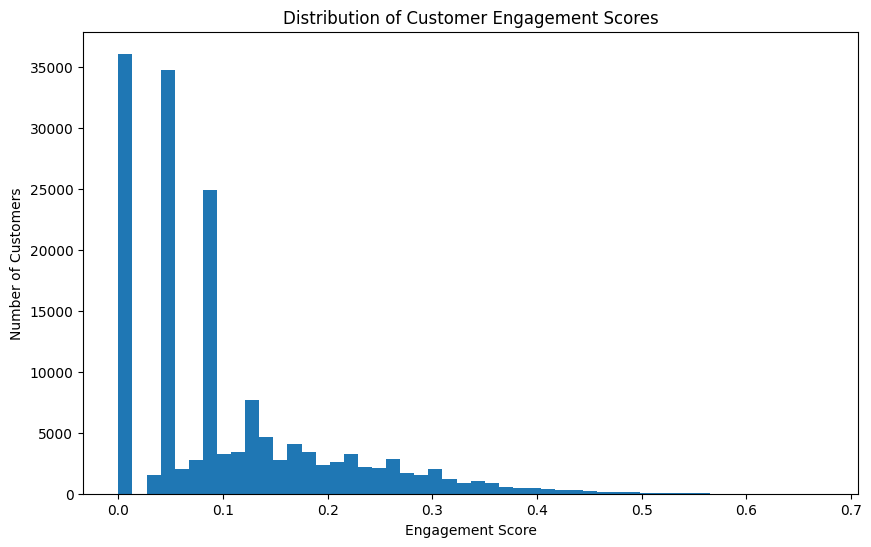

In [19]:
# Distribution of engagement scores
plt.figure(figsize=(10, 6))
plt.hist(customer_df['engagement_score'], bins=50)
plt.title('Distribution of Customer Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Customers')
plt.savefig('engagement_distribution.png')





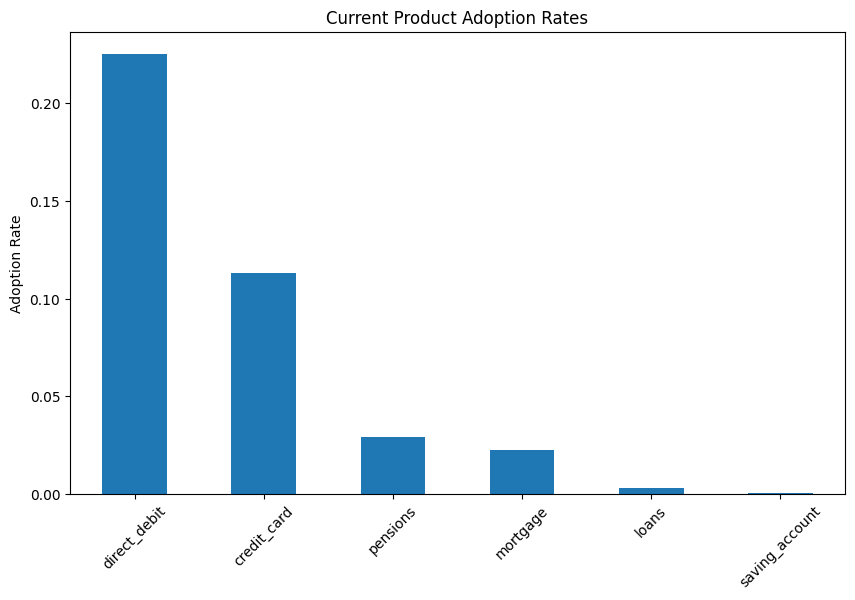

In [20]:
# Product adoption rates
adoption_rates = customer_df[product_cols].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
adoption_rates.plot(kind='bar')
plt.title('Current Product Adoption Rates')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)
plt.savefig('product_adoption_rates.png')

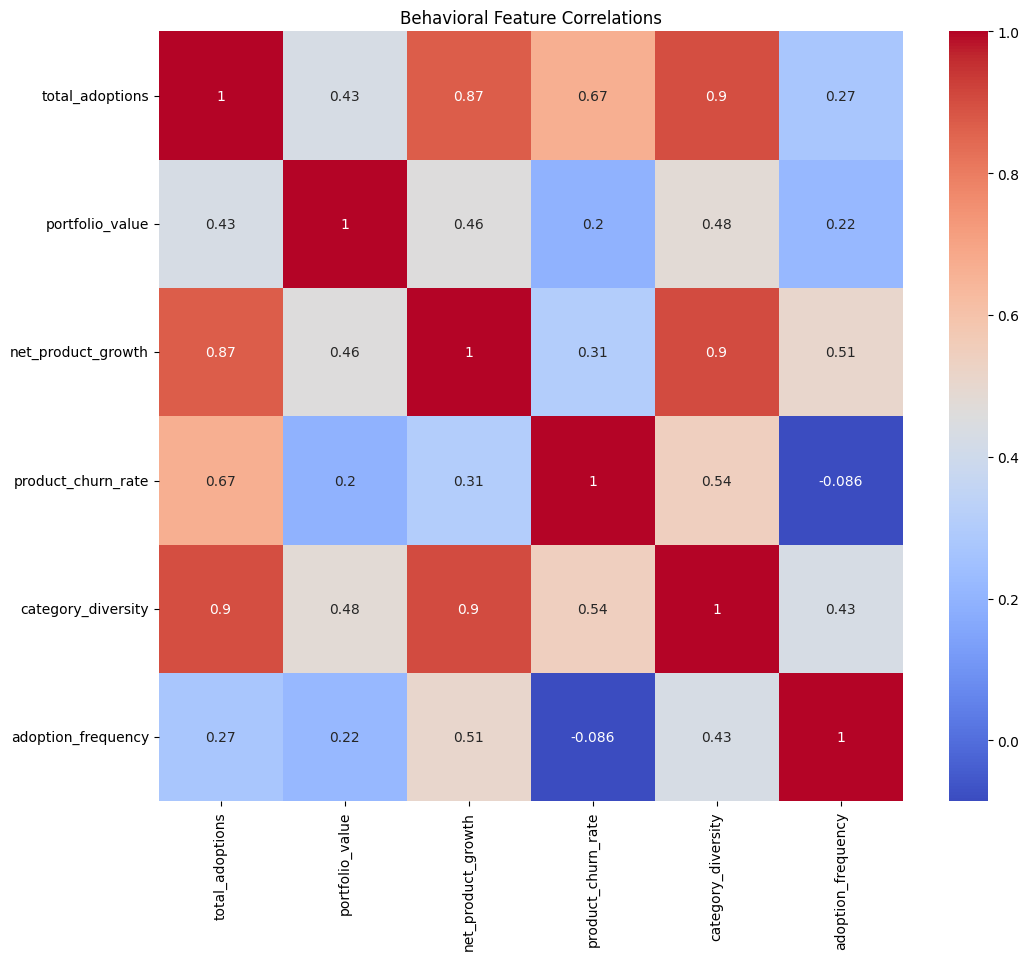

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
behavioral_features = [
    'total_adoptions', 'portfolio_value', 'net_product_growth',
    'product_churn_rate', 'category_diversity', 'adoption_frequency'
]
sns.heatmap(customer_df[behavioral_features].corr(), annot=True, cmap='coolwarm')
plt.title('Behavioral Feature Correlations')
plt.savefig('feature_correlations.png')

In [22]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
import os

drive.mount('/content/drive')

# Create the directory structure if it doesn't exist
import os

# Define the full path (based on your Drive structure)
save_path = '/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/'


# Create directories if they don't exist
os.makedirs(save_path, exist_ok=True)
print(f"✓ Directory created/verified: {save_path}")

# Save the DataFrame
customer_df.to_parquet(save_path + 'final_features.parquet', index=True)
print(f"✓ File saved successfully to: {save_path}final_features.parquet")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Directory created/verified: /content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/
✓ File saved successfully to: /content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/final_features.parquet
